# In the beginning, I copy two function from previous assignment

### the function get_folim_map_plot is for plotting folim, which can plot blue nodes on given location.

In [304]:
def get_folim_map_plot(neighbor_data, latitude, longitude):
    folium_map = folium.Map(location=[latitude, longitude], zoom_start=11)

    # add markers to map
    for lat, lng, label in zip(neighbor_data['Latitude'], 
                               neighbor_data['Longitude'], 
                               neighbor_data['Neighborhood']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(folium_map)
        
    return folium_map

### the function getNearbyVenus is for explore venues, whiche can get nearby venues from foursquare website

In [305]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# I live in Taipei, so I read Taipei Postcal code from Wiki

#### import packages

In [306]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### The wikipeida URL:https://en.wikipedia.org/wiki/Postal_codes_in_Taiwan

#### The layout of the table in wiki shows below in a image.

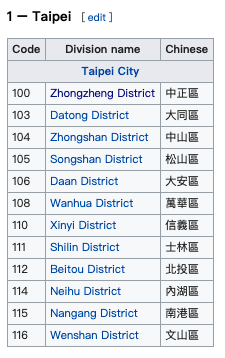

#### use request and BeautifulSoup to get postcal data from the URL

In [307]:
url = r'https://en.wikipedia.org/wiki/Postal_codes_in_Taiwan'

In [308]:
html = requests.get(url)

In [309]:
soup = BeautifulSoup(html.text)

#### check tags in html and transform html information to text

In [310]:
soup.find_all('table')[1].find_all('tr')[1].get_text().split('\n')[1:-1]

['Taipei City']

#### use for loop to create the postcal list. P.S. Taipei postcal table is the second table in website.

In [311]:
output_list = []
for row_text in soup.find_all('table')[1].find_all('tr'):
    tmp_postcal = row_text.get_text().split('\n')[1:-1]
    if len(tmp_postcal) == 1:
        tmp_city = tmp_postcal[0]
    if len(tmp_postcal) > 1 and tmp_postcal[0] != 'Code':
        tmp_postcal.append(tmp_city)
        output_list.append(tmp_postcal)
output_list

[['100', 'Zhongzheng District', '中正區', 'Taipei City'],
 ['103', 'Datong District', '大同區', 'Taipei City'],
 ['104', 'Zhongshan District', '中山區', 'Taipei City'],
 ['105', 'Songshan District', '松山區', 'Taipei City'],
 ['106', 'Daan District', '大安區', 'Taipei City'],
 ['108', 'Wanhua District', '萬華區', 'Taipei City'],
 ['110', 'Xinyi District', '信義區', 'Taipei City'],
 ['111', 'Shilin District', '士林區', 'Taipei City'],
 ['112', 'Beitou District', '北投區', 'Taipei City'],
 ['114', 'Neihu District', '內湖區', 'Taipei City'],
 ['115', 'Nangang District', '南港區', 'Taipei City'],
 ['116', 'Wenshan District', '文山區', 'Taipei City']]

#### use for loop to create the postcal list. P.S. New Taipei postcal table is the thrid table in website.

#### because not noly postcal codes are recorded in the third table, I keep the city information.

In [312]:
for row_text in soup.find_all('table')[2].find_all('tr'):
    tmp_postcal = row_text.get_text().split('\n')[1:-1]
    if len(tmp_postcal) == 1:
        tmp_city = tmp_postcal[0]
    if len(tmp_postcal) > 1 and tmp_postcal[0] != 'Code':
        tmp_postcal.append(tmp_city)
        output_list.append(tmp_postcal)
output_list[-5:-1]

[['268', 'Wujie Township', '五結鄉', 'Yilan County'],
 ['269', 'Dongshan Township', '冬山鄉', 'Yilan County'],
 ['270', "Su'ao Township", '蘇澳鎮', 'Yilan County'],
 ['272', "Nan'ao Township", '南澳鄉', 'Yilan County']]

#### change the columns name, and the data type of "Code" column

In [313]:
output_table = pd.DataFrame(output_list)
output_table.columns = ['Code', 'Neighborhood','Mandarin', 'City']

In [314]:
output_table.dtypes

Code            object
Neighborhood    object
Mandarin        object
City            object
dtype: object

In [315]:
output_table['Code'] = output_table['Code'].astype('int')
output_table.dtypes

Code             int64
Neighborhood    object
Mandarin        object
City            object
dtype: object

In [316]:
output_table.shape

(65, 4)

#### Show the first 5 columns of the output table 

In [317]:
output_table.head()

,Code,Neighborhood,Mandarin,City
0,100,Zhongzheng District,中正區,Taipei City
1,103,Datong District,大同區,Taipei City
2,104,Zhongshan District,中山區,Taipei City
3,105,Songshan District,松山區,Taipei City
4,106,Daan District,大安區,Taipei City


#### Check elements in "City" column 

In [318]:
output_table['City'].unique()

array(['Taipei City', 'Keelung City', 'Lienchiang County (Matsu)',
       'New Taipei City', 'Yilan County'], dtype=object)

#### This study only foucus on Taipei city and New Taipei city, so I ignore the others.

In [319]:
taipei_data = output_table[(output_table['City']=='Taipei City')|
                           (output_table['City']=='New Taipei City')]

#### Due to that the geocode package lost connection. Thus, read the coordination data from local.

In [320]:
geo_data = pd.read_csv('latitude_and_ longitude_in taiwan.csv')
geo_data.head()

,行政區名,_x0033_碼郵遞區號,中心點經度,中心點緯度,TGOS_URL
0,臺北市中正區,100,121.519884,25.032405,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
1,臺北市大同區,103,121.513042,25.063424,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
2,臺北市中山區,104,121.538160,25.069699,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
3,臺北市松山區,105,121.557588,25.059991,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
4,臺北市大安區,106,121.543445,25.026770,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...


In [321]:
geo_data.columns = ['Mandarin_with_city_name', 'Code','Longitude','Latitude','URL']
geo_data.head()

,Mandarin_with_city_name,Code,Longitude,Latitude,URL
0,臺北市中正區,100,121.519884,25.032405,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
1,臺北市大同區,103,121.513042,25.063424,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
2,臺北市中山區,104,121.538160,25.069699,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
3,臺北市松山區,105,121.557588,25.059991,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...
4,臺北市大安區,106,121.543445,25.026770,http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...


In [322]:
geo_data.drop(columns = 'URL', inplace = True)
geo_data.head()

,Mandarin_with_city_name,Code,Longitude,Latitude
0,臺北市中正區,100,121.519884,25.032405
1,臺北市大同區,103,121.513042,25.063424
2,臺北市中山區,104,121.538160,25.069699
3,臺北市松山區,105,121.557588,25.059991
4,臺北市大安區,106,121.543445,25.026770


#### Merge the coordination data to the postal code data.

In [323]:
taipei_data = pd.merge(taipei_data, geo_data, on = 'Code')
taipei_data.tail()

,Code,Neighborhood,Mandarin,City,Mandarin_with_city_name,Longitude,Latitude
36,248,Wugu District,五股區,New Taipei City,新北市五股區,121.433214,25.096147
37,249,Bali District,八里區,New Taipei City,新北市八里區,121.413836,25.138128
38,251,Tamsui District,淡水區,New Taipei City,新北市淡水區,121.463904,25.189076
39,252,Sanzhi District,三芝區,New Taipei City,新北市三芝區,121.515558,25.231599
40,253,Shimen District,石門區,New Taipei City,新北市石門區,121.569276,25.265181


#### Because the Mandarin name columns are duplicate, I drop one of them.

In [324]:
taipei_data.drop(columns = 'Mandarin_with_city_name', inplace = True)
taipei_data.head()

,Code,Neighborhood,Mandarin,City,Longitude,Latitude
0,100,Zhongzheng District,中正區,Taipei City,121.519884,25.032405
1,103,Datong District,大同區,Taipei City,121.513042,25.063424
2,104,Zhongshan District,中山區,Taipei City,121.538160,25.069699
3,105,Songshan District,松山區,Taipei City,121.557588,25.059991
4,106,Daan District,大安區,Taipei City,121.543445,25.026770


In [325]:
taipei_data.shape

(41, 6)

# Prepare Neighborhoods data in Taipei and New Taipei City

In [377]:
from geopy.geocoders import Nominatim
import folium 
from pandas.io.json import json_normalize
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import random

#### Change the variable name of the dataframe achieved from the second part of the assignment.

In [327]:
neighborhoods = taipei_data.drop(columns = 'Code')

#### Use geopy library to get the latitude and longitude values of Taipei.

In [328]:
address = 'New Taipei, Taiwan'

geolocator = Nominatim(user_agent="tw_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 25.011997, 121.4656619.


#### Create a map of Taipei with neighborhoods superimposed on top.

In [329]:
map_taipei = get_folim_map_plot(taipei_data,latitude,longitude)
map_taipei

# Explore Neighborhoods in Taipei

#### Define Foursquare Credentials and Version


In [330]:
CLIENT_ID = 'EUYBJPFTP1O4XS41AXXNWGCCVDVTGGNL0AB4Z3L0NBUYSMA2' # your Foursquare ID
CLIENT_SECRET = 'PW0F1XTMO5ZP3PLZE4C3LIKLD4C40XYJ1BCZSZPFFERZGK3F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EUYBJPFTP1O4XS41AXXNWGCCVDVTGGNL0AB4Z3L0NBUYSMA2
CLIENT_SECRET:PW0F1XTMO5ZP3PLZE4C3LIKLD4C40XYJ1BCZSZPFFERZGK3F


#### The same funciton creates to repeat the same process to all the neighborhoods in Taipei

In [334]:
taipei_venues = getNearbyVenues(taipei_data.Neighborhood, taipei_data.Latitude, taipei_data.Longitude)

Zhongzheng District
Datong District
Zhongshan District
Songshan District
Daan District
Wanhua District
Xinyi District
Shilin District
Beitou District
Neihu District
Nangang District
Wenshan District
Wanli District
Jinshan District
Banqiao District
Xizhi District
Shenkeng District
Shiding District
Ruifang District
Pingxi District
Shuangxi District
Gongliao District
Xindian District
Pinglin District
Wulai District
Yonghe District
Zhonghe District
Tucheng District
Sanxia District
Shulin District
Yingge District
Sanchong District
Xinzhuang District
Taishan District
Linkou District
Luzhou District
Wugu District
Bali District
Tamsui District
Sanzhi District
Shimen District


#### Let's check the size of the resulting dataframe

In [335]:
len(taipei_venues['Neighborhood'].unique())

38

In [336]:
print(taipei_venues.shape)
taipei_venues.head()

(1168, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zhongzheng District,25.032405,121.519884,Kinfen Braised Pork Rice (金峰魯肉飯),25.032194,121.518534,Taiwanese Restaurant
1,Zhongzheng District,25.032405,121.519884,Chiang Kai-Shek Memorial Hall (中正紀念堂),25.034555,121.521835,Monument / Landmark
2,Zhongzheng District,25.032405,121.519884,National Theater (國家戲劇院),25.035197,121.518188,Theater
3,Zhongzheng District,25.032405,121.519884,National Concert Hall (國家音樂廳),25.036850,121.519282,Concert Hall
4,Zhongzheng District,25.032405,121.519884,Ebisu Curry & Coffee,25.030015,121.516384,Japanese Restaurant


In [337]:
taipei_venues['Venue Category'].unique()

array(['Taiwanese Restaurant', 'Monument / Landmark', 'Theater',
       'Concert Hall', 'Japanese Restaurant', 'Latin American Restaurant',
       'Bakery', 'Tea Room', 'Noodle House', 'Plaza', 'Bar', 'Café',
       'Breakfast Spot', 'Hakka Restaurant', 'Massage Studio',
       'Ice Cream Shop', 'Chinese Breakfast Place', 'Snack Place',
       'Sushi Restaurant', 'Gym', 'Food Truck', 'Dumpling Restaurant',
       'Coffee Shop', 'Shanghai Restaurant', 'Indian Restaurant',
       'Pizza Place', 'Chinese Restaurant', 'Asian Restaurant',
       'History Museum', 'Garden', 'Juice Bar', 'Fried Chicken Joint',
       'Hotpot Restaurant', 'Dim Sum Restaurant',
       'Vegetarian / Vegan Restaurant', 'Market', 'Hotel',
       'Historic Site', 'Szechuan Restaurant', 'Bookstore', 'Park',
       'Playground', 'Xinjiang Restaurant', 'Seafood Restaurant',
       'Museum', 'Food Stand', 'Performing Arts Venue', 'Dessert Shop',
       'Record Shop', 'Pub', 'Italian Restaurant', 'Dive Bar',
       'Nig

## we only focus the venues that can buy coffee and bread

In [338]:
coffee_and_bread = taipei_venues[(taipei_venues['Venue Category']=='Café')|
                                 (taipei_venues['Venue Category']=='Coffee Shop')|
                                 (taipei_venues['Venue Category']=='Convenience Store')|
                                 (taipei_venues['Venue Category']=='Bakery')|
                                 (taipei_venues['Venue Category']=='Breakfast Spot')
                                ]

In [339]:
coffee_and_bread.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Zhongzheng District,25.032405,121.519884,樂田麵包屋 Gakuden Boulangerie,25.032757,121.517534,Bakery
12,Zhongzheng District,25.032405,121.519884,虎記商行,25.031744,121.519284,Café
13,Zhongzheng District,25.032405,121.519884,高三孝碳烤吐司,25.032296,121.517595,Breakfast Spot
16,Zhongzheng District,25.032405,121.519884,生活在他方 Elsewhere Cafe,25.030536,121.520630,Café
17,Zhongzheng District,25.032405,121.519884,劉媽媽飯糰,25.029405,121.522020,Breakfast Spot


### There are 9 neighborhood have no venue related to coffee and bread.

In [340]:
print('Number of all neighborhood:',len(taipei_venues['Neighborhood'].unique()))
print('Number of neighborhood can buy coffee or bread:',len(coffee_and_bread['Neighborhood'].unique()))

Number of all neighborhood: 38
Number of neighborhood can buy coffee or bread: 28


## Analyze Each Neighborhood

#### Use one-hot encoding to transform the venues data 

In [341]:
# one hot encoding
coffee_and_bread_onehot = pd.get_dummies(coffee_and_bread[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
coffee_and_bread_onehot['Neighborhood'] = coffee_and_bread['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [coffee_and_bread_onehot.columns[-1]] + list(coffee_and_bread_onehot.columns[:-1])
coffee_and_bread_onehot = coffee_and_bread_onehot[fixed_columns]

#### Because I prefer pour over coffee, I combine 'Cafe' and 'Coffee Shop' to a new column 'Not Convenience Store Coffe'.

In [342]:
coffee_and_bread_onehot['Not Convenience Store Coffe'] = coffee_and_bread_onehot[['Café','Coffee Shop']].sum(axis = 1)
coffee_and_bread_onehot.rename(columns = {'Convenience Store':'Convenience Store Coffe'},  inplace = True)
coffee_and_bread_onehot.drop(columns = ['Café', 'Coffee Shop'], inplace = True)
coffee_and_bread_onehot.head()

,Neighborhood,Bakery,Breakfast Spot,Convenience Store Coffe,Not Convenience Store Coffe
6,Zhongzheng District,1,0,0,0
12,Zhongzheng District,0,0,0,1
13,Zhongzheng District,0,1,0,0
16,Zhongzheng District,0,0,0,1
17,Zhongzheng District,0,1,0,0


#### And let's examine the new dataframe size.

In [343]:
coffee_and_bread_onehot.shape

(236, 5)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [344]:
coffee_and_bread_grouped = coffee_and_bread_onehot.groupby('Neighborhood').mean().reset_index()
coffee_and_bread_grouped

,Neighborhood,Bakery,Breakfast Spot,Convenience Store Coffe,Not Convenience Store Coffe
0,Banqiao District,0.071429,0.071429,0.285714,0.571429
1,Daan District,0.142857,0.047619,0.000000,0.809524
2,Datong District,0.076923,0.076923,0.000000,0.846154
3,Jinshan District,0.000000,0.000000,1.000000,0.000000
4,Luzhou District,0.000000,0.000000,1.000000,0.000000
5,Nangang District,0.000000,0.000000,0.750000,0.250000
6,Neihu District,0.058824,0.176471,0.529412,0.235294
7,Pingxi District,0.000000,0.000000,0.000000,1.000000
8,Ruifang District,0.000000,0.000000,0.000000,1.000000
9,Sanchong District,0.000000,0.000000,0.666667,0.333333


#### Let's confirm the new size

In [345]:
coffee_and_bread_grouped.shape

(28, 5)

# Data Visulization

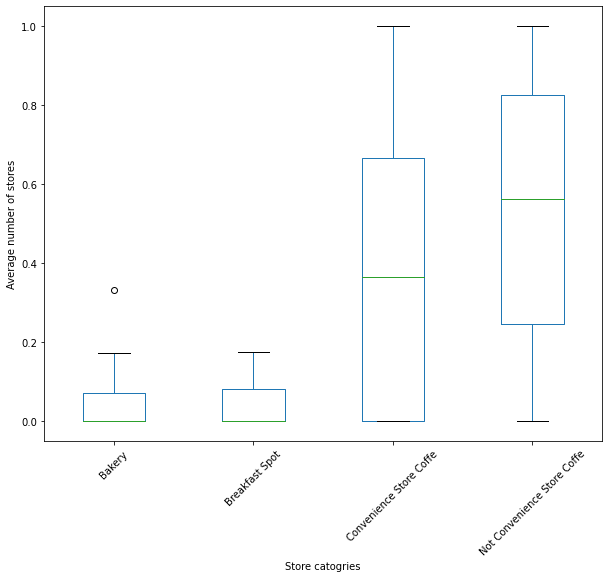

In [346]:
coffee_and_bread_grouped.plot(kind = 'box', figsize = (10,8))
plt.xticks(rotation = 45)
plt.xlabel('Store catogries')
plt.ylabel('Average number of stores')
plt.show()

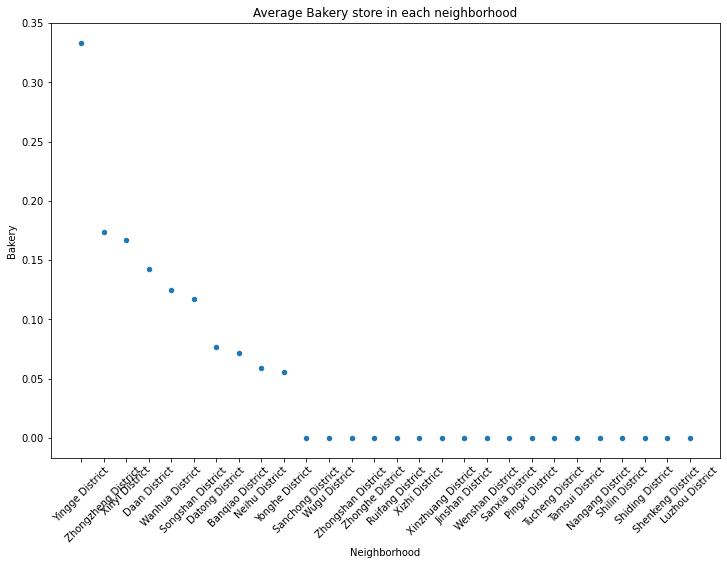

In [347]:
sort_for_plot = coffee_and_bread_grouped.sort_values(by = 'Bakery', ascending = False)
sort_for_plot.plot(kind = 'scatter', x = 'Neighborhood', y = 'Bakery', figsize = (12, 8))
plt.xticks(rotation=45) 
plt.title('Average Bakery store in each neighborhood')
plt.show()

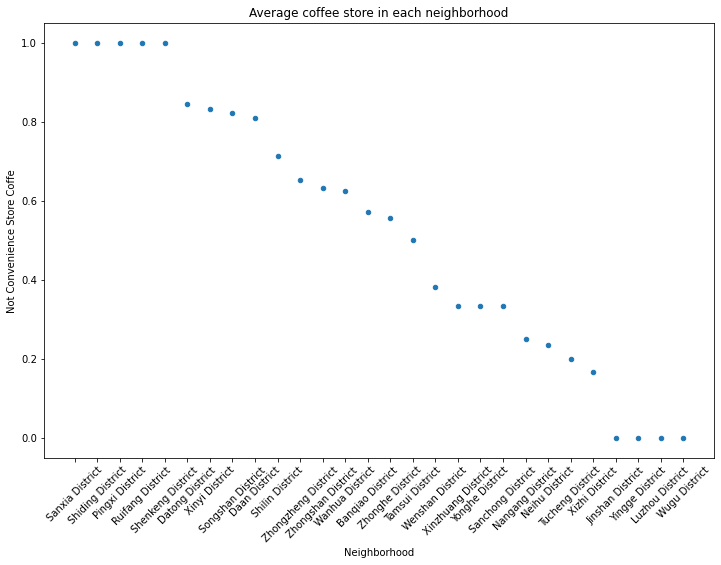

In [348]:
sort_for_plot = coffee_and_bread_grouped.sort_values(by = 'Not Convenience Store Coffe', ascending = False)
sort_for_plot.plot(kind = 'scatter', x = 'Neighborhood', y = 'Not Convenience Store Coffe', figsize = (12, 8))
plt.xticks(rotation=45) 
plt.title('Average coffee store in each neighborhood')
plt.show()

# Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.

In [444]:
random.seed(12)

# set number of clusters
kclusters = 8

coffe_and_bread_grouped_clustering = coffee_and_bread_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coffe_and_bread_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 4, 4, 5, 3, 0, 0, 5], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [445]:
coffee_and_bread_grouped['Cluster Labels'] = kmeans.labels_ +1
coffee_and_bread_grouped.head()

,Neighborhood,Bakery,Breakfast Spot,Convenience Store Coffe,Not Convenience Store Coffe,Cluster Labels
0,Banqiao District,0.071429,0.071429,0.285714,0.571429,3
1,Daan District,0.142857,0.047619,0.000000,0.809524,2
2,Datong District,0.076923,0.076923,0.000000,0.846154,2
3,Jinshan District,0.000000,0.000000,1.000000,0.000000,5
4,Luzhou District,0.000000,0.000000,1.000000,0.000000,5


In [446]:
final_data = pd.merge(taipei_data, coffee_and_bread_grouped, on = 'Neighborhood')
final_data.tail()

,Code,Neighborhood,Mandarin,City,Longitude,Latitude,Bakery,Breakfast Spot,Convenience Store Coffe,Not Convenience Store Coffe,Cluster Labels
23,241,Sanchong District,三重區,New Taipei City,121.487098,25.062817,0.0,0.0,0.666667,0.333333,6
24,242,Xinzhuang District,新莊區,New Taipei City,121.436753,25.035830,0.0,0.0,0.666667,0.333333,6
25,247,Luzhou District,蘆洲區,New Taipei City,121.471246,25.089272,0.0,0.0,1.000000,0.000000,5
26,248,Wugu District,五股區,New Taipei City,121.433214,25.096147,0.0,0.0,1.000000,0.000000,5
27,251,Tamsui District,淡水區,New Taipei City,121.463904,25.189076,0.0,0.0,0.500000,0.500000,7


In [447]:
final_data.shape

(28, 11)

In [448]:
coffee_and_bread_grouped_plot = final_data.groupby(['Cluster Labels'])['Bakery', 'Breakfast Spot','Convenience Store Coffe','Not Convenience Store Coffe'].mean()
coffee_and_bread_grouped_plot.reset_index(inplace = True)
coffee_and_bread_grouped_plot['Cluster Labels'] = coffee_and_bread_grouped_plot['Cluster Labels'].astype(str)
coffee_and_bread_grouped_plot

<ipython-input-448-3cd69ee0dce2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  coffee_and_bread_grouped_plot = final_data.groupby(['Cluster Labels'])['Bakery', 'Breakfast Spot','Convenience Store Coffe','Not Convenience Store Coffe'].mean()


,Cluster Labels,Bakery,Breakfast Spot,Convenience Store Coffe,Not Convenience Store Coffe
0,1,0.000000,0.000000,0.000000,1.000000
1,2,0.135601,0.071456,0.000000,0.792943
2,3,0.049107,0.075423,0.239897,0.635573
3,4,0.038126,0.127607,0.517740,0.316527
4,5,0.000000,0.000000,1.000000,0.000000
5,6,0.000000,0.033333,0.710000,0.256667
6,7,0.000000,0.000000,0.472222,0.527778
7,8,0.333333,0.000000,0.666667,0.000000


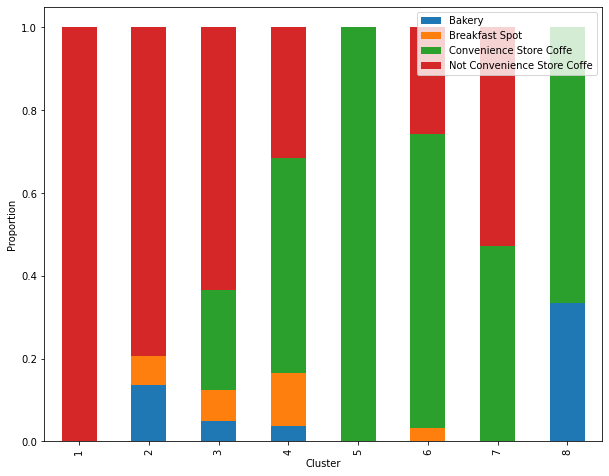

In [449]:
coffee_and_bread_grouped_plot.plot(kind = 'bar', x = 'Cluster Labels', stacked = True, figsize = (10,8))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.show()

<ipython-input-450-548233e23a63>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  coffee_and_bread_grouped_plot = final_data.groupby(['City'])['Bakery', 'Breakfast Spot','Convenience Store Coffe','Not Convenience Store Coffe'].mean()


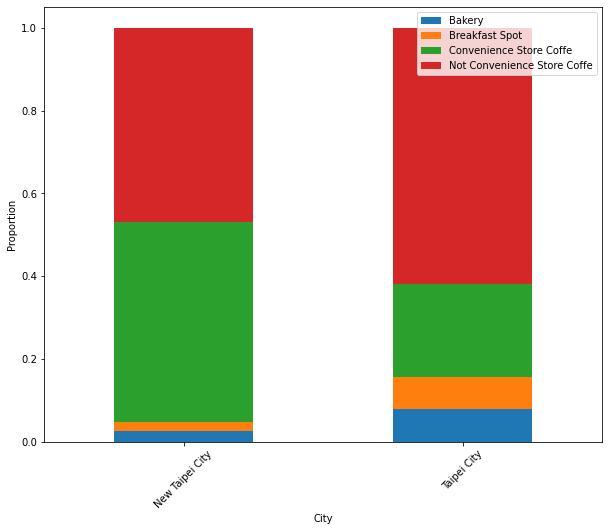

In [450]:
coffee_and_bread_grouped_plot = final_data.groupby(['City'])['Bakery', 'Breakfast Spot','Convenience Store Coffe','Not Convenience Store Coffe'].mean()
coffee_and_bread_grouped_plot.reset_index(inplace = True)
coffee_and_bread_grouped_plot
coffee_and_bread_grouped_plot.plot(kind = 'bar',x = 'City', stacked = True, figsize = (10,8))
plt.xlabel('City')
plt.xticks(rotation = 45)
plt.ylabel('Proportion')
plt.show()

In [451]:
neighborhood_in_cluster_English = []
neighborhood_in_cluster_Mandarin = []
for num_cluster in range(1, kclusters+1):
    sub_final_data = final_data[final_data['Cluster Labels']==num_cluster]
    neighborhood_in_cluster_English.append([num_cluster, ','.join(list(sub_final_data['Neighborhood']))])
    neighborhood_in_cluster_Mandarin.append([num_cluster, ','.join(list(sub_final_data['Mandarin']))])
neighborhood_in_cluster_English = pd.DataFrame(neighborhood_in_cluster_English, columns = ['Cluster', 'Neighborhoods'])
neighborhood_in_cluster_Mandarin = pd.DataFrame(neighborhood_in_cluster_Mandarin, columns = ['Cluster', 'Neighborhoods'])

In [452]:
neighborhood_in_cluster_English

,Cluster,Neighborhoods
0,1,"Shenkeng District,Shiding District,Ruifang Dis..."
1,2,"Zhongzheng District,Datong District,Songshan D..."
2,3,"Zhongshan District,Wanhua District,Shilin Dist..."
3,4,"Neihu District,Wenshan District,Yonghe District"
4,5,"Jinshan District,Luzhou District,Wugu District"
5,6,"Nangang District,Xizhi District,Tucheng Distri..."
6,7,"Zhonghe District,Tamsui District"
7,8,Yingge District


In [453]:
neighborhood_in_cluster_Mandarin

,Cluster,Neighborhoods
0,1,"深坑區,石碇區,瑞芳區,平溪區,三峽區"
1,2,"中正區,大同區,松山區,大安區,信義區"
2,3,"中山區,萬華區,士林區,板橋區"
3,4,"內湖區,文山區,永和區"
4,5,"金山區,蘆洲區,五股區"
5,6,"南港區,汐止區,土城區,三重區,新莊區"
6,7,"中和區,淡水區"
7,8,鶯歌區


In [454]:
neighborhodd_in_cluster = neighborhood_in_cluster_English.merge(neighborhood_in_cluster_Mandarin, on = 'Cluster')
neighborhodd_in_cluster.columns = ['Cluster',
                                   'Neighborhoods in English',
                                   'Neighborhoods in Mandarin'
                                  ]
neighborhodd_in_cluster

,Cluster,Neighborhoods in English,Neighborhoods in Mandarin
0,1,"Shenkeng District,Shiding District,Ruifang Dis...","深坑區,石碇區,瑞芳區,平溪區,三峽區"
1,2,"Zhongzheng District,Datong District,Songshan D...","中正區,大同區,松山區,大安區,信義區"
2,3,"Zhongshan District,Wanhua District,Shilin Dist...","中山區,萬華區,士林區,板橋區"
3,4,"Neihu District,Wenshan District,Yonghe District","內湖區,文山區,永和區"
4,5,"Jinshan District,Luzhou District,Wugu District","金山區,蘆洲區,五股區"
5,6,"Nangang District,Xizhi District,Tucheng Distri...","南港區,汐止區,土城區,三重區,新莊區"
6,7,"Zhonghe District,Tamsui District","中和區,淡水區"
7,8,Yingge District,鶯歌區


# Explore Neighborhoods in Taipei

Finally, let's visualize the resulting clusters

In [389]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_data['Latitude'], final_data['Longitude'], final_data['Neighborhood'], final_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters